In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob
from sklearn.metrics import mean_absolute_error
%matplotlib inline

In [18]:
perf_dir = os.path.abspath('../predictions_varlength_ts/')

In [19]:
dirnames_filenames_dict = {'pchmm':'PCHMM', 
                           'GRU-D' : 'GRUD'}

perf_df_list = []
for dirname, fname in dirnames_filenames_dict.items():
    perf_csv = os.path.join(perf_dir, dirname, '%s_performance_toy_data.csv'%fname)
    perf_df = pd.read_csv(perf_csv)
    perf_df_list.append(perf_df)
perf_df_final = pd.concat(perf_df_list)

searchfor = ['PCHMM']
s=perf_df_final['model'].copy()
pchmm_inds = [s.str.contains('|'.join(searchfor))][0]
gru_inds = ~(pchmm_inds)
perf_df_final.loc[pchmm_inds, 'model'] = perf_df_final.loc[pchmm_inds, 'model']+ ' (parameters=10)'
perf_df_final.loc[gru_inds, 'model'] = perf_df_final.loc[gru_inds, 'model']+ ' (parameters=1024)'
perf_df_final
# pchmm_inds = perf_df_final['model'].contains('PCHMM')

,train_AUC,valid_AUC,test_AUC,model,perc_obs
0,0.796104,0.539526,0.651515,PCHMM no imputation (ours) (parameters=10),20
1,0.817976,0.832016,0.739394,PCHMM no imputation (ours) (parameters=10),40
2,0.939519,0.940711,0.881818,PCHMM no imputation (ours) (parameters=10),60
3,0.984428,0.990119,0.977273,PCHMM no imputation (ours) (parameters=10),80
4,1.000000,0.998024,1.000000,PCHMM no imputation (ours) (parameters=10),100
5,0.577604,0.431818,0.566667,PCHMM forward fill imputation (parameters=10),20
6,0.686708,0.623518,0.481061,PCHMM forward fill imputation (parameters=10),40
7,0.763020,0.772727,0.718182,PCHMM forward fill imputation (parameters=10),60
8,0.862691,0.798419,0.816667,PCHMM forward fill imputation (parameters=10),80
9,1.000000,0.998024,1.000000,PCHMM forward fill imputation (parameters=10),100


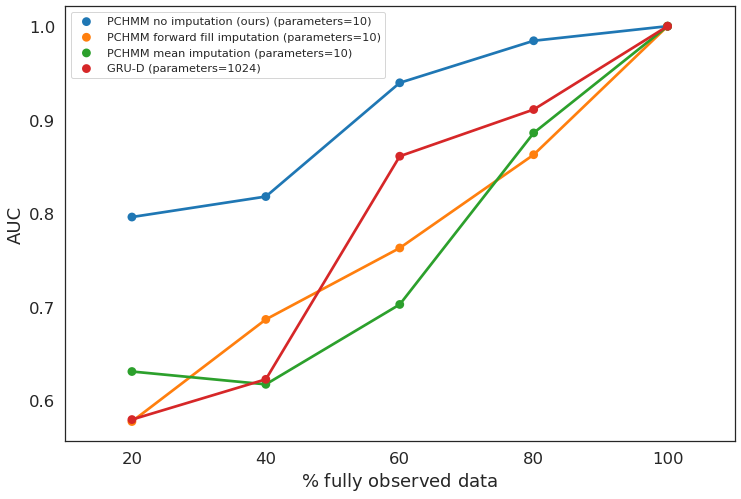

In [20]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
sns.set_style("white") # or use "white" if we don't want grid lines
sns.set_context("notebook", font_scale=1.5)
# sns.set(font_scale=1.4)
sns.pointplot(data=perf_df_final, x='perc_obs', y='train_AUC', hue='model', ax=ax, marker='.')
ax.set_ylabel('AUC')
ax.set_xlabel(r'$\%$ fully observed data')
ax.legend(fontsize=11.3)
# ax.set_ylim([0.335, 1.02])
f.savefig('toy_data_performance_pchmm_vs_grud_missing_data.png',bbox_inches='tight', pad_inches=0)
f.savefig('toy_data_performance_pchmm_vs_grud_missing_data.pdf',bbox_inches='tight', pad_inches=0)
plt.show()